         Date Slot No.      RefSt  Sensor_O3       Temp     RelHum
0  16-12-2021  SLOT-13  14.898448  42.818182  42.937931  25.986207
1  16-12-2021  SLOT-14  14.491333  37.101695  37.216667  30.165000
2  16-12-2021  SLOT-15  13.160678  35.305085  36.057627  31.477966
3  16-12-2021  SLOT-17  20.806102  45.228070  34.900000  35.988136
4  16-12-2021  SLOT-18  31.322000  60.355932  34.765000  43.976667
Loss functions:
* R-squared = -57.1012158112851
* RMSE = 1874.349264592265
* MAE = 41.35473196003796
         Date Slot No.      RefSt  Sensor_O3       Temp     RelHum
0  16-12-2021  SLOT-13  14.898448  42.818182  42.937931  25.986207
1  16-12-2021  SLOT-14  14.491333  37.101695  37.216667  30.165000
2  16-12-2021  SLOT-15  13.160678  35.305085  36.057627  31.477966
3  16-12-2021  SLOT-17  20.806102  45.228070  34.900000  35.988136
4  16-12-2021  SLOT-18  31.322000  60.355932  34.765000  43.976667
Date          object
Slot No.      object
RefSt        float64
Sensor_O3    float64
Temp       

<ipython-input-1-f95d33d84fb0>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]


Correlation:  0.5764721716377931


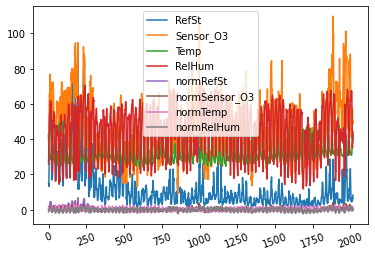

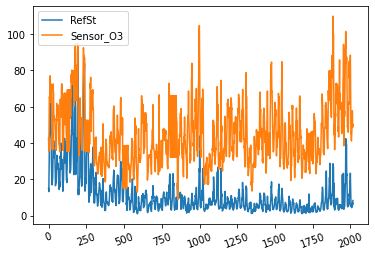

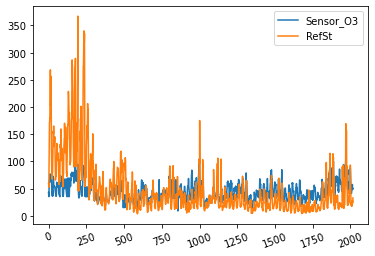

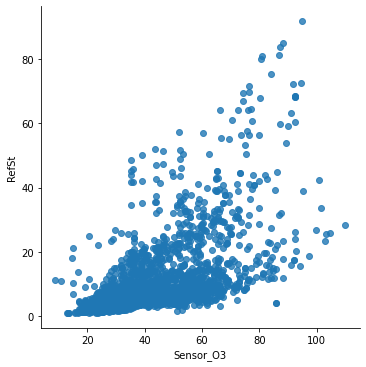

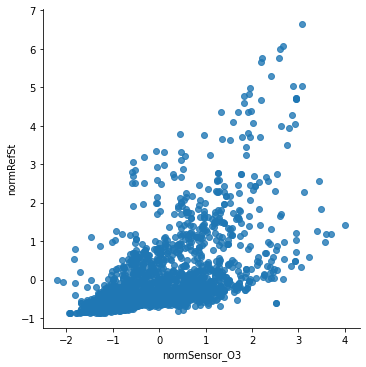

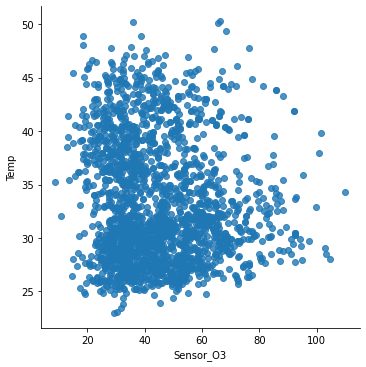

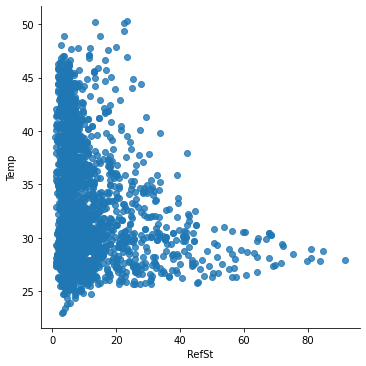

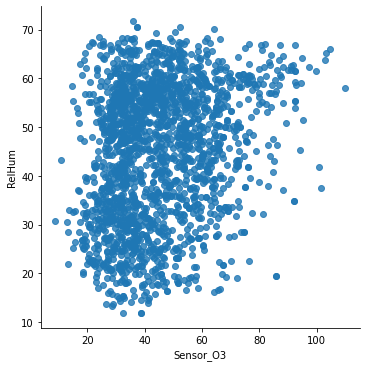

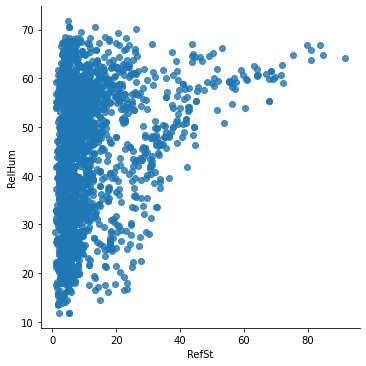

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime

#%%
# Read sensor data
sensor = pd.read_csv("PM1_RM.csv")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'RefSt': sensor["RefSt"], 'Sensor_O3': sensor["Sensor_O3"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})

# Split main dataset and build train and test datasets
X = df[['Sensor_O3', 'Temp', 'RelHum']]
Y = df['RefSt']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'RefSt': Y_train, 'Sensor_O3': X_train["Sensor_O3"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'RefSt': Y_test, 'Sensor_O3': X_test["Sensor_O3"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    print("* RMSE =", mean_squared_error(y_true, y_pred))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["Sensor_O3"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normRefSt"] = normalize(df["RefSt"])
df["normSensor_O3"] = normalize(df["Sensor_O3"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Sensor_O3 = sensor[["Temp", "Sensor_O3"]]
print(Temp_Sensor_O3.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["RefSt", "Sensor_O3"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Sensor_O3_RefSt_factor = df[["Sensor_O3", "RefSt"]]
Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]
Sensor_O3_RefSt_factor.plot()
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Sensor_O3', y = 'RefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normSensor_O3', y = 'normRefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["RefSt"].tolist()
x = pd.Series(x)

y = df["Sensor_O3"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -21.90769418658796
Coefficients: 
 [0.52867131 0.14802737 0.17502408]
Loss functions:
* R-squared = -2.9866194509698563
* RMSE = 128.60862086612667
* MAE = 9.731352539380072
Intercept: 
 [13.68599542]
Coefficients: 
 [8.42622618 0.30600037 1.99110782]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -2.912566428214742
* RMSE = 126.21966519964433
* MAE = 9.604951941206604
Correlation_MLR_Pred:  0.8286780926560313
Correlation_MLR_SGD_Pred:  0.8291241435886182


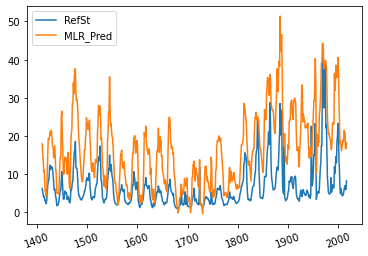

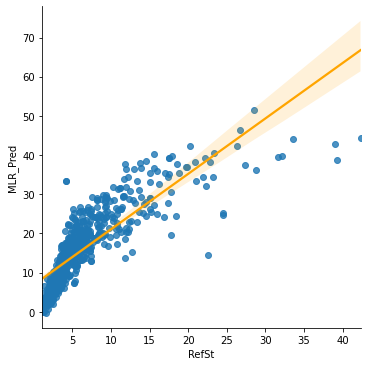

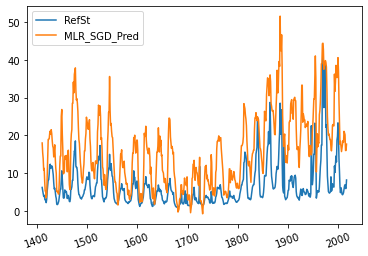

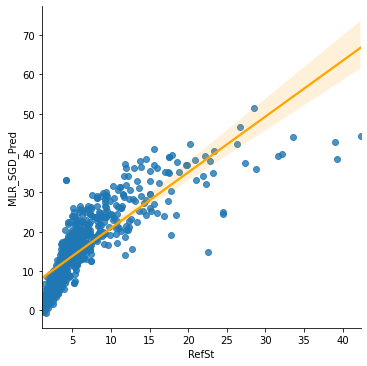

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Sensor_O3"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["RefSt", "MLR_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["RefSt", "MLR_SGD_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_SGD_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1411  6.269123  47.983051  29.007018  58.001754  17.905104     18.002512   
1412  5.405424  44.762712  28.937288  52.749153  15.272950     15.475019   
1413  4.662759  41.500000  28.562069  54.058621  13.721693     13.902049   
1414  3.936034  36.474576  28.356897  51.943103  10.664258     10.873974   
1415  4.179500  37.847458  28.841667  49.708333  11.070682     11.299047   
...        ...        ...        ...        ...        ...           ...   
2012  6.657667  57.694915  40.686667  36.980000  21.089083     20.682889   
2013  6.966667  57.050847  43.206667  35.005000  20.775939     20.179598   
2014  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2015  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2016  8.236167  50.220339  39.293333  44.260000  18.205413     17.697991   

       KNN_Pred  
1411  17.499424  
1412  13.323172  
1413   9.934799  
1414   6.917186

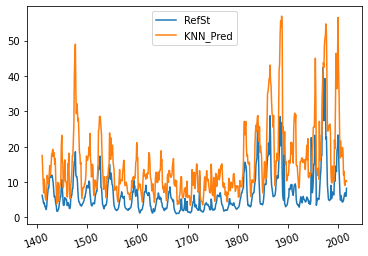

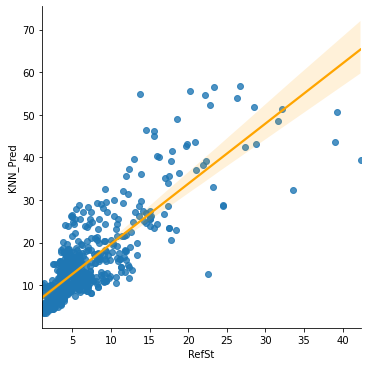

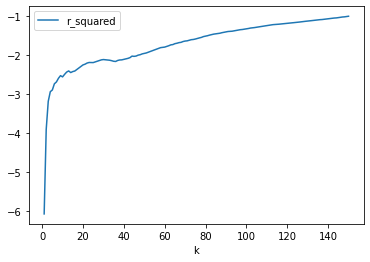

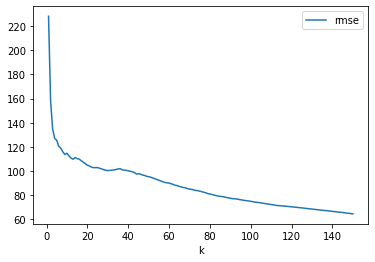

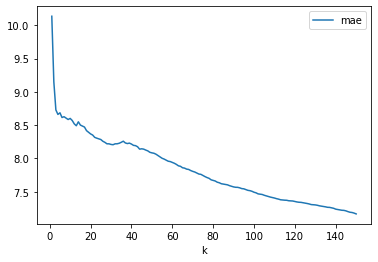

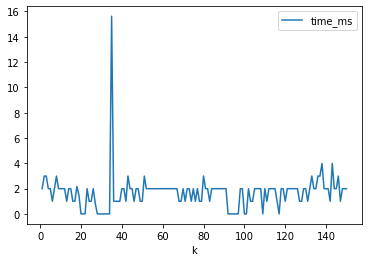

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "KNN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'RefSt': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["KNN_Pred"].corr(x)
print("Correlation: ", corr)

         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1411  6.269123  47.983051  29.007018  58.001754  17.905104     18.002512   
1412  5.405424  44.762712  28.937288  52.749153  15.272950     15.475019   
1413  4.662759  41.500000  28.562069  54.058621  13.721693     13.902049   
1414  3.936034  36.474576  28.356897  51.943103  10.664258     10.873974   
1415  4.179500  37.847458  28.841667  49.708333  11.070682     11.299047   
...        ...        ...        ...        ...        ...           ...   
2012  6.657667  57.694915  40.686667  36.980000  21.089083     20.682889   
2013  6.966667  57.050847  43.206667  35.005000  20.775939     20.179598   
2014  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2015  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2016  8.236167  50.220339  39.293333  44.260000  18.205413     17.697991   

       KNN_Pred    RF_Pred  
1411  17.499424  20.592867  
1412  13.323172  11.125302  


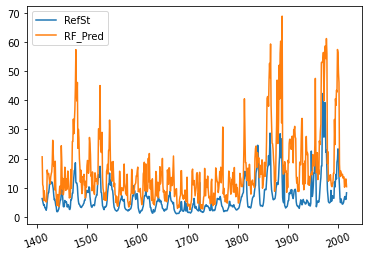

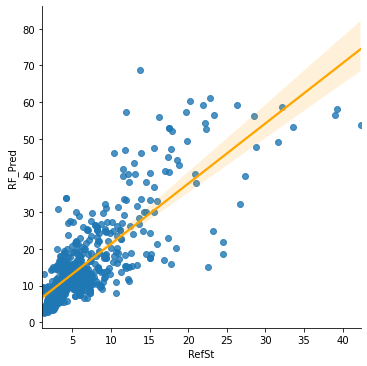

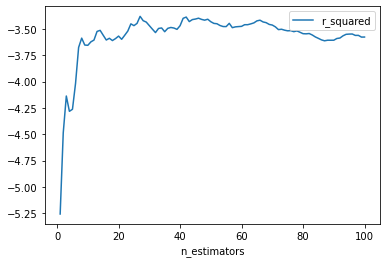

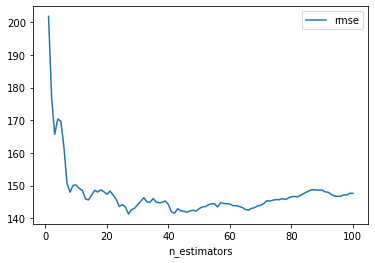

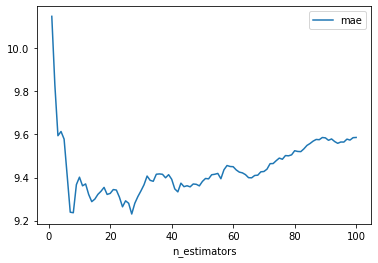

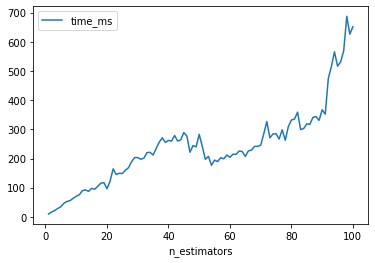

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "RF_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'RefSt': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

Loss functions:
* R-squared = -1.1001708598712017
* RMSE = 67.75165806346358
* MAE = 5.6910203452785
Loss functions:
* R-squared = -2.2683967030773466
* RMSE = 105.43870504718288
* MAE = 8.566106439819798
Correlation:  1 0.829269707666095
Correlation:  2 0.8608385314709422
Correlation:  3 0.7339256509854296


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  4 0.27081082365128617


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  5 0.10409568398191078


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  6 0.28087083015078784


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  7 0.34365706739519614


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  8 0.1417600975027635


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  9 0.0030716158143802527


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  10 0.0754471157030066


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  11 0.0670799963060601


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  12 0.2050827466120158


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  13 0.21635982530639694


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  14 0.28661434226676274


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  15 0.2788079866834708


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  16 0.2898489990405919


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  17 0.3660254455079346


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  18 -0.26300665522760597


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  19 0.2469117707204677


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  20 -0.07291216317082042


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  21 -0.11790535745515016


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  22 -0.2530570047001511


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  23 -0.20633074358291434


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  24 0.21552727777303152


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Correlation:  25 0.038912778894070285
           r_squared          rmse          mae    time_ms
degree                                                    
1      -2.790986e+00  1.222975e+02     9.509767    140.595
2      -2.268397e+00  1.054387e+02     8.566106    148.657
3      -3.307058e+00  1.389460e+02     9.905571    370.868
4      -1.414557e+01  4.885970e+02    13.990166   1877.076
5      -3.169763e+01  1.054828e+03    17.652926   2350.610
6      -3.111311e+01  1.035971e+03    15.324015   1939.733
7      -6.468470e+01  2.118993e+03    17.003387   2307.479
8      -6.011425e+01  1.971550e+03    18.096589   2190.818
9      -1.661437e+02  5.392068e+03    23.555635   2587.451
10     -7.465477e+02  2.411594e+04    32.522942   2289.088
11     -2.516891e+02  8.151768e+03    30.352355   2461.344
12     -4.981790e+04  1.607161e+06   138.554199   2115.671
13     -1.619844e+05  5.225662e+06   234.361965   2012.196
14     -2.127972e+05  6.864884e+06   246.134870   1963.278
15     -2.743091e+

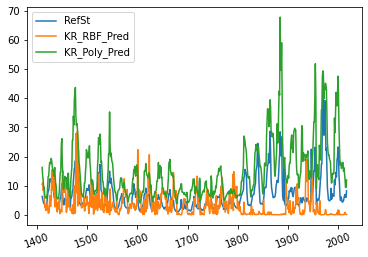

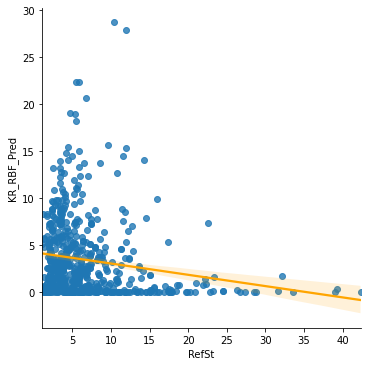

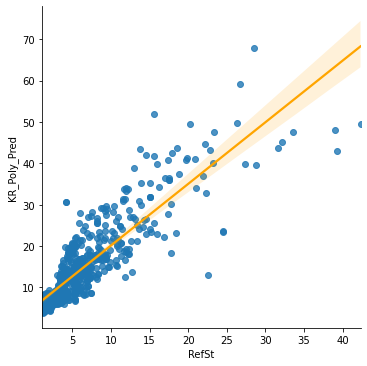

In [10]:
# %%
# Kernel Regression
# from sklearn_extensions.kernel_regression import KernelRegression
from sklearn.kernel_ridge import KernelRidge

# Models
kr_rbf = KernelRidge(kernel = "rbf")
kr_poly = KernelRidge(kernel = "poly", degree = 2)

# Fit
kr_rbf.fit(X_train, Y_train)
kr_poly.fit(X_train, Y_train)

# Predict
df_test["KR_RBF_Pred"] = kr_rbf.predict(X_test)
df_test["KR_Poly_Pred"] = kr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "KR_RBF_Pred", "KR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'KR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_Poly_Pred"])


# %%
# Polynomial Kernel Regression stats vs. hyperparameters
def kr_stats():
    kr_aux = pd.DataFrame({'RefSt': Y_test})

    degree = [*range(1, 26, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in degree:
        kr = KernelRidge(kernel = "poly", degree = i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        kr.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        kr_aux["KR_Pred"] = kr.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = kr_aux["KR_Pred"].corr(x)
        print("Correlation: ",i, corr)
#         print("type",type(kr_aux["KR_Pred"]))

        # Loss
        r_squared.append(r2_score(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        rmse.append(mean_squared_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        mae.append(mean_absolute_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        time_ms.append(execution_time)

    kr_stats = pd.DataFrame({'degree': degree, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    kr_stats = kr_stats.set_index('degree') # index column (X axis for the plots)
    print(kr_stats)

#     # plot
#     kr_stats[["r_squared"]].plot()
#     kr_stats[["rmse"]].plot()
#     kr_stats[["mae"]].plot()
#     kr_stats[["time_ms"]].plot()

kr_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_poly = df_test["KR_Poly_Pred"].corr(x)
corr_rbf = df_test["KR_RBF_Pred"].corr(x)
print("Correlation_poly: ", corr_poly)
print("Correlation_rbf: ", corr_rbf)

RBF params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = -2.5892831540113717
* RMSE = 115.79052428069693
* MAE = 8.786119666047929
Loss functions:
* R-squared = 

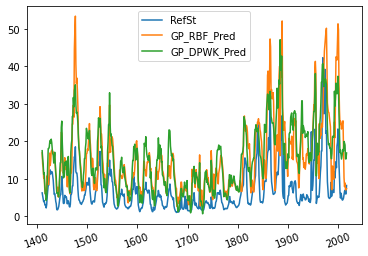

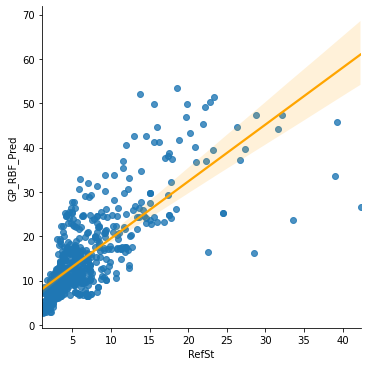

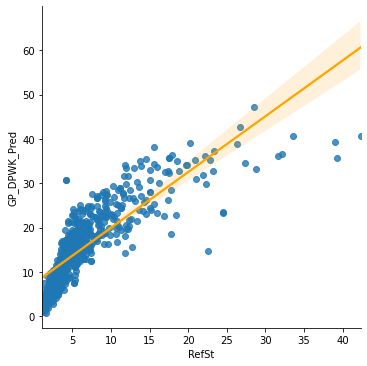

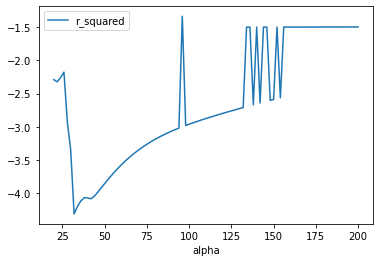

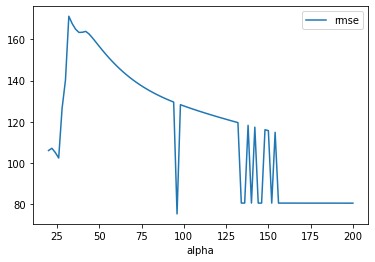

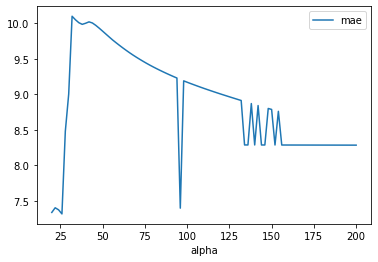

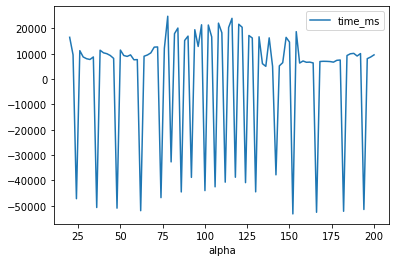

In [6]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 150, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_rbf.fit(X_train, Y_train)
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test)
df_test["GP_DPWK_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["RefSt", "GP_RBF_Pred", "GP_DPWK_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'GP_DPWK_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_DPWK_Pred"])


# %%
# Gaussian Process stats vs. hyperparameters
def gp_stats():
    gp_aux = pd.DataFrame({'RefSt': Y_test})

    alpha = [*range(20, 202, 2)]
    # alpha = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50,100,150,200]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    rbf = ConstantKernel() * RBF()

    for i in alpha:
        gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = i, random_state = 0)
        # gp = GaussianProcessRegressor(kernel=rbf, alpha=i, random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        gp_rbf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        gp_aux["GP_RBF_Pred"] = gp_rbf.predict(X_test)

        # Loss
        r_squared.append(r2_score(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        rmse.append(mean_squared_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        mae.append(mean_absolute_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        time_ms.append(execution_time)

    gp_stats = pd.DataFrame({'alpha': alpha, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    gp_stats = gp_stats.set_index('alpha') # index column (X axis for the plots)
    print(gp_stats)

    # plot
    gp_stats[["r_squared"]].plot()
    gp_stats[["rmse"]].plot()
    gp_stats[["mae"]].plot()
    gp_stats[["time_ms"]].plot()

gp_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["GP_RBF_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -4.660929697554323
* RMSE = 182.62198591476894
* MAE = 9.449353344394872
Loss functions:
* R-squared = -0.834708240242193
* RMSE = 59.18781548408463
* MAE = 6.747660569011091
Loss functions:
* R-squared = -2.6011945197810835
* RMSE = 116.17478576918737
* MAE = 7.649902495049859
         RefSt  Sensor_O3       Temp     RelHum  KR_RBF_Pred  KR_Poly_Pred  \
1411  6.269123  47.983051  29.007018  58.001754    10.427237     16.286067   
1412  5.405424  44.762712  28.937288  52.749153    11.064569     13.295369   
1413  4.662759  41.500000  28.562069  54.058621     8.349845     11.895458   
1414  3.936034  36.474576  28.356897  51.943103     9.006172      9.150634   
1415  4.179500  37.847458  28.841667  49.708333     7.457756      9.453969   
...        ...        ...        ...        ...          ...           ...   
2012  6.657667  57.694915  40.686667  36.980000     0.623531     14.122747   
2013  6.966667  57.050847  43.206667  35.005000     0.811939     12

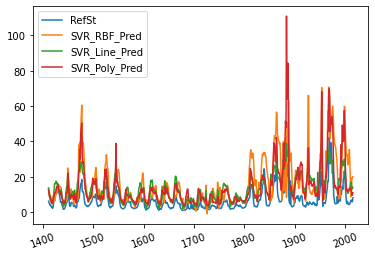

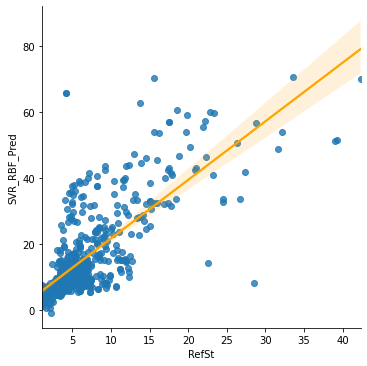

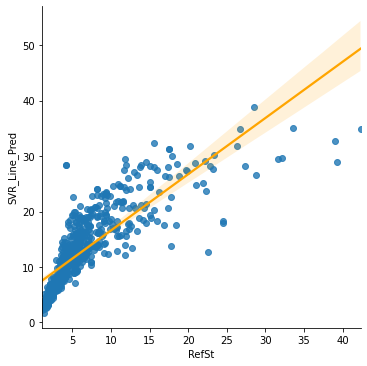

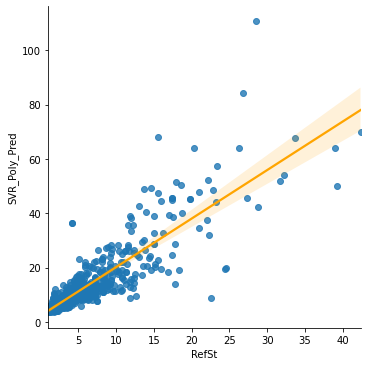

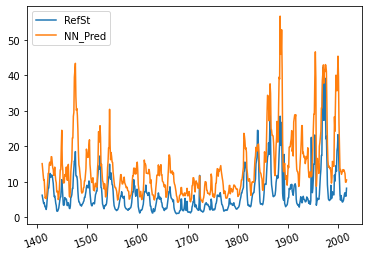

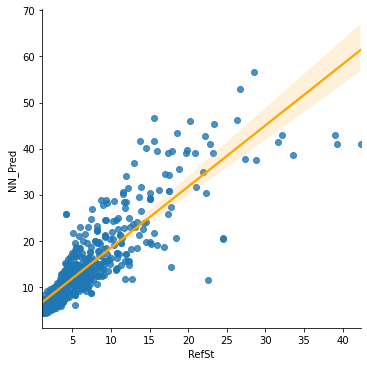

In [12]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Line_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "SVR_RBF_Pred", "SVR_Line_Pred", "SVR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Line_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Line_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Poly_Pred"])


# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
corr_lin = df_test["SVR_Line_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)
print("Correlation_corr_lin: ", corr_lin)

2.10.0
Epoch 1/750
142/142 [==============================] - 2s 3ms/step - loss: 155.2423
Epoch 2/750
142/142 [==============================] - 0s 3ms/step - loss: 96.4258
Epoch 3/750
142/142 [==============================] - 0s 3ms/step - loss: 93.1829
Epoch 4/750
142/142 [==============================] - 0s 3ms/step - loss: 93.4225
Epoch 5/750
142/142 [==============================] - 0s 4ms/step - loss: 91.1503
Epoch 6/750
142/142 [==============================] - 1s 4ms/step - loss: 88.8581
Epoch 7/750
142/142 [==============================] - 0s 3ms/step - loss: 88.6703
Epoch 8/750
142/142 [==============================] - 0s 3ms/step - loss: 86.0106
Epoch 9/750
142/142 [==============================] - 1s 4ms/step - loss: 88.2408
Epoch 10/750
142/142 [==============================] - 1s 4ms/step - loss: 87.0346
Epoch 11/750
142/142 [==============================] - 1s 4ms/step - loss: 84.0619
Epoch 12/750
142/142 [==============================] - 0s 3ms/step - loss: 8

142/142 [==============================] - 1s 4ms/step - loss: 48.0654
Epoch 195/750
142/142 [==============================] - 1s 4ms/step - loss: 45.5251
Epoch 196/750
142/142 [==============================] - 0s 3ms/step - loss: 49.1254
Epoch 197/750
142/142 [==============================] - 1s 4ms/step - loss: 48.3278
Epoch 198/750
142/142 [==============================] - 0s 3ms/step - loss: 48.6879
Epoch 199/750
142/142 [==============================] - 1s 4ms/step - loss: 48.7996
Epoch 200/750
142/142 [==============================] - 1s 4ms/step - loss: 49.3021
Epoch 201/750
142/142 [==============================] - 1s 4ms/step - loss: 46.2505
Epoch 202/750
142/142 [==============================] - 1s 4ms/step - loss: 46.2253
Epoch 203/750
142/142 [==============================] - 1s 4ms/step - loss: 47.0122
Epoch 204/750
142/142 [==============================] - 0s 3ms/step - loss: 50.2144
Epoch 205/750
142/142 [==============================] - 0s 3ms/step - loss: 43

142/142 [==============================] - 0s 3ms/step - loss: 26.2962
Epoch 387/750
142/142 [==============================] - 0s 3ms/step - loss: 25.6067
Epoch 388/750
142/142 [==============================] - 0s 3ms/step - loss: 23.8079
Epoch 389/750
142/142 [==============================] - 0s 3ms/step - loss: 21.2307
Epoch 390/750
142/142 [==============================] - 0s 3ms/step - loss: 23.6790
Epoch 391/750
142/142 [==============================] - 0s 3ms/step - loss: 25.9436
Epoch 392/750
142/142 [==============================] - 1s 5ms/step - loss: 24.3970
Epoch 393/750
142/142 [==============================] - 1s 4ms/step - loss: 22.3616
Epoch 394/750
142/142 [==============================] - 1s 4ms/step - loss: 25.1736
Epoch 395/750
142/142 [==============================] - 1s 5ms/step - loss: 23.1795
Epoch 396/750
142/142 [==============================] - 1s 4ms/step - loss: 27.5421
Epoch 397/750
142/142 [==============================] - 1s 5ms/step - loss: 25

142/142 [==============================] - 0s 3ms/step - loss: 17.9899
Epoch 579/750
142/142 [==============================] - 0s 3ms/step - loss: 12.9593
Epoch 580/750
142/142 [==============================] - 1s 4ms/step - loss: 17.8289
Epoch 581/750
142/142 [==============================] - 1s 4ms/step - loss: 14.6855
Epoch 582/750
142/142 [==============================] - 0s 3ms/step - loss: 17.4714
Epoch 583/750
142/142 [==============================] - 0s 3ms/step - loss: 17.7212
Epoch 584/750
142/142 [==============================] - 0s 3ms/step - loss: 26.9820
Epoch 585/750
142/142 [==============================] - 1s 4ms/step - loss: 25.1440
Epoch 586/750
142/142 [==============================] - 0s 3ms/step - loss: 22.8134
Epoch 587/750
142/142 [==============================] - 0s 3ms/step - loss: 13.5440
Epoch 588/750
142/142 [==============================] - 1s 4ms/step - loss: 12.0432
Epoch 589/750
142/142 [==============================] - 0s 3ms/step - loss: 11

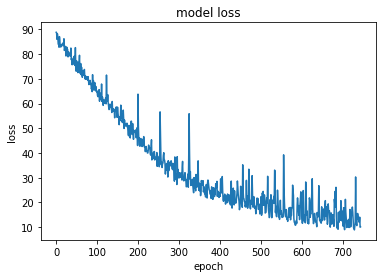

19/19 [==============================] - 0s 3ms/step
         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1411  6.269123  47.983051  29.007018  58.001754  17.905104     18.002512   
1412  5.405424  44.762712  28.937288  52.749153  15.272950     15.475019   
1413  4.662759  41.500000  28.562069  54.058621  13.721693     13.902049   
1414  3.936034  36.474576  28.356897  51.943103  10.664258     10.873974   
1415  4.179500  37.847458  28.841667  49.708333  11.070682     11.299047   
...        ...        ...        ...        ...        ...           ...   
2012  6.657667  57.694915  40.686667  36.980000  21.089083     20.682889   
2013  6.966667  57.050847  43.206667  35.005000  20.775939     20.179598   
2014  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2015  5.991333  48.603448  42.481667  37.700000  16.674412     16.015540   
2016  8.236167  50.220339  39.293333  44.260000  18.205413     17.697991   

       KNN_Pred    RF_Pred  KR_RBF

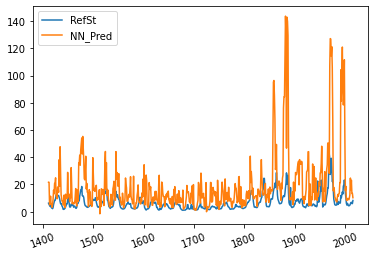

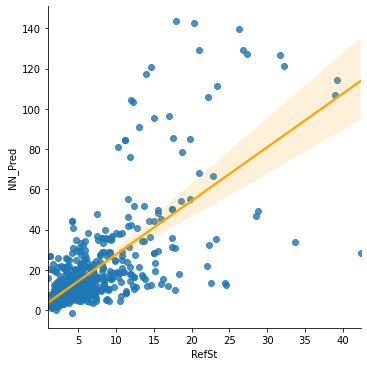

In [8]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 750)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)